In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import RidgeCV
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from scipy.special import boxcox, inv_boxcox

In [2]:
# Чтение файла
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
df_train = df_train.drop(columns = ['Id'])
df_test = df_test.drop(columns = ['Id'])

In [6]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Гистограмма распределения

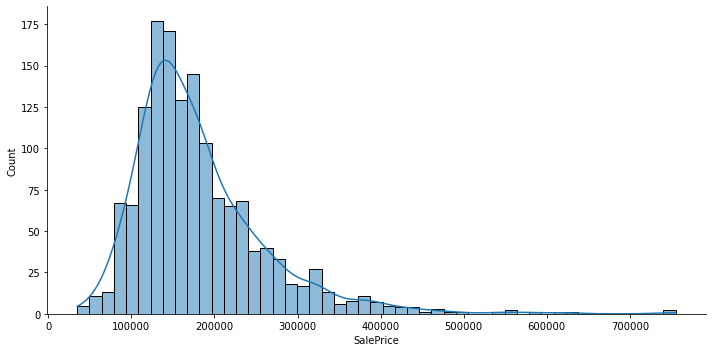

In [7]:
sns.displot(df_train['SalePrice'], kind = 'hist', kde = True,
            aspect = 2)

In [8]:
#Ассиметрия - скошенность графиков влево/вправо
df_train['SalePrice'].skew()
#Как я понял, должно быть меньше, чем меньше,
#тем распределение ближе к нормальному распределению

1.8828757597682129

In [9]:
#Эксцесс - мера высоты
df_train['SalePrice'].kurt()
#Также высокое значение

6.536281860064529

Ассиметрия = 0.12134661989685333
Эксцесс = 0.809519155707878


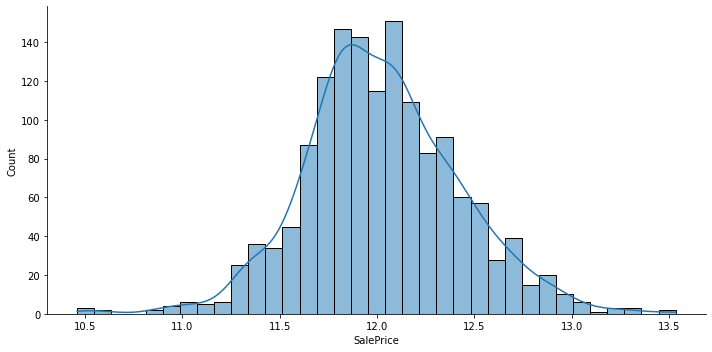

In [10]:
#Логарифмирование
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
sns.displot(df_train['SalePrice'], kde = True, aspect = 2)
print('Ассиметрия = {skew}'.format(skew = df_train['SalePrice'].skew()))
print('Эксцесс = {kurt}'.format(kurt = df_train['SalePrice'].kurt()))
#Уже лучше

In [11]:
# Box-Cox
#sale_price, lmbda  = stats.boxcox(sale_price)
#boxcox_kurt_raw = round(stats.kurtosis(sale_price),2)
#boxcox_skewness_raw = round(stats.skew(sale_price), 2)
#sns.histplot(sale_price, kde = 'True')
#print(f'Skewness: {boxcox_skewness_raw} \nKurtosis: {boxcox_kurt_raw}')

# Корреляция

<AxesSubplot:>

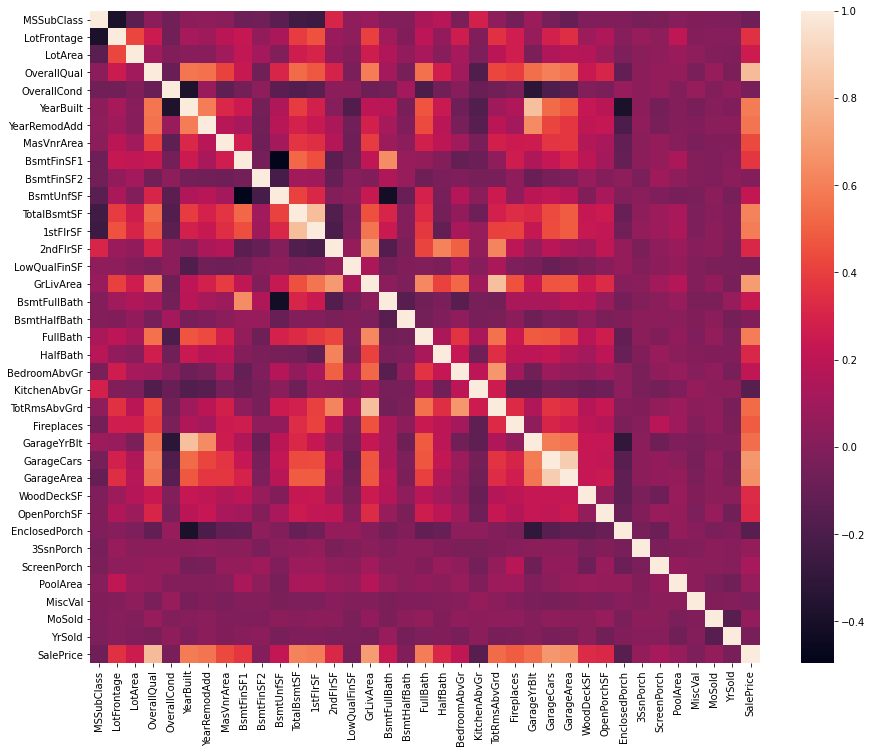

In [12]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat)

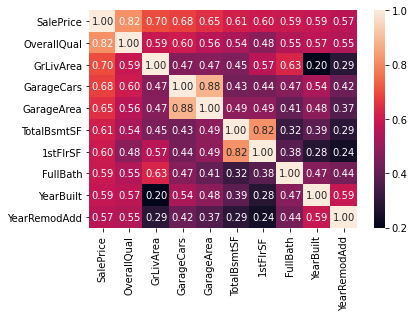

Можно взять признаки: OverallQual, GrLiveArea, GarageCars, GarageArea
OverallQual - общее качество дома (можно попробовать использовать только этот признак?)
GrLivArea - площадь
GarageCars - количество машин, которые можно поместить в гараж
GarageArea - площадь гаража


In [13]:
k = 10
columns = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
coefm = np.corrcoef(df_train[columns].values.T)
heatm = sns.heatmap(coefm, annot = True, fmt = '.2f',
                    annot_kws = {'size': 10},
                    yticklabels = columns.values,
                    xticklabels = columns.values)
sns.set(font_scale = 1.25)
plt.show()
print('Можно взять признаки: OverallQual, GrLiveArea, GarageCars, GarageArea')
print('OverallQual - общее качество дома (можно попробовать использовать только этот признак?)')
print('GrLivArea - площадь')
print('GarageCars - количество машин, которые можно поместить в гараж')
print('GarageArea - площадь гаража')

# Выбросы

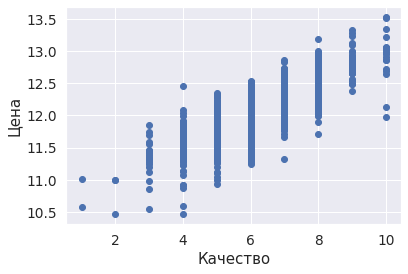

In [14]:
plt.scatter(df_train['OverallQual'], df_train['SalePrice'])
plt.ylabel('Цена')
plt.xlabel('Качество')
plt.show()

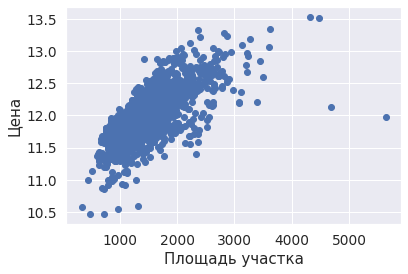

In [15]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.xlabel('Площадь участка')
plt.ylabel('Цена')
plt.show()

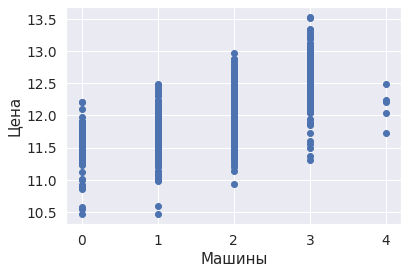

In [16]:
plt.scatter(df_train['GarageCars'], df_train['SalePrice'])
plt.xlabel('Машины')
plt.ylabel('Цена')
plt.show()

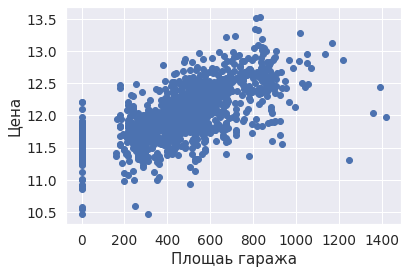

In [17]:
plt.scatter(df_train['GarageArea'], df_train['SalePrice'])
plt.xlabel('Площаь гаража')
plt.ylabel('Цена')
plt.show()

# Удаление выбросов

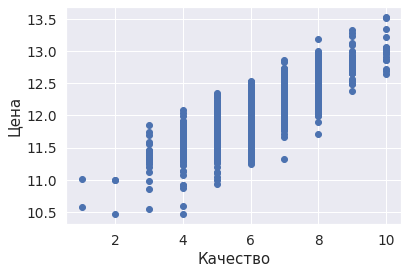

In [18]:
# Качество
df_train = df_train.drop(df_train[(df_train['OverallQual'] > 9) & (df_train['SalePrice'] < 12.5)].index)
df_train = df_train.drop(df_train[(df_train['OverallQual'] == 4) & (df_train['SalePrice']> 12.3)].index)
plt.scatter(df_train['OverallQual'], df_train['SalePrice'])
plt.ylabel('Цена')
plt.xlabel('Качество')
plt.show()

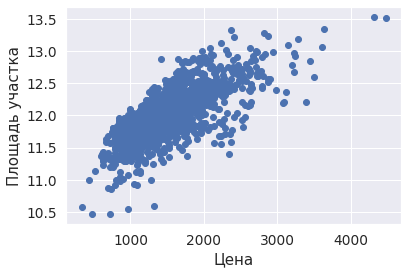

In [19]:
# Площадь участка
df_train = df_train.drop(df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 12.5)].index)
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.xlabel('Цена')
plt.ylabel('Площадь участка')
plt.show()

In [20]:
# К гаражам следует вернуться, чтобы посмотреть, насколько может 
# улучшиться качество модели, так как корреляция цена/гараж слабее,
# чем в предыдущих случаях. Возможно кто-то продает просто огромный 
# гараж, следовательно цена должна быть меньше

# Очистка данных

In [21]:
df_train.isnull().sum().sort_values(ascending = False)

PoolQC           1451
MiscFeature      1403
Alley            1366
Fence            1176
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
MSSubClass          0
Length: 80, dtype: int64

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1457 non-null   int64  
 1   MSZoning       1457 non-null   object 
 2   LotFrontage    1199 non-null   float64
 3   LotArea        1457 non-null   int64  
 4   Street         1457 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1457 non-null   object 
 7   LandContour    1457 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1457 non-null   object 
 10  LandSlope      1457 non-null   object 
 11  Neighborhood   1457 non-null   object 
 12  Condition1     1457 non-null   object 
 13  Condition2     1457 non-null   object 
 14  BldgType       1457 non-null   object 
 15  HouseStyle     1457 non-null   object 
 16  OverallQual    1457 non-null   int64  
 17  OverallCond    1457 non-null   int64  
 18  YearBuil

In [24]:
df_train.shape

(1457, 80)

In [25]:
train_test = pd.concat([df_train.iloc[:,:-1], df_test], axis = 0)

In [26]:
def clear_data(df):
    num_columns = [i for i in df.columns if df[i].dtype in ['int64', 'float64']]
    cat_columns = [i for i in df.columns if df[i].dtype in ['object']]
    values = {}
    for i in num_columns:
        values[i] = df[i].median()
    for i in cat_columns:
        values[i] = 'N'
    return df.fillna(value = values)

In [27]:
train_test = clear_data(train_test)

In [29]:
train_test.isnull().sum().sort_values(ascending = False)

SaleCondition    0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
                ..
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
MSSubClass       0
Length: 79, dtype: int64

In [30]:
# Кодируем признаки


In [31]:
def getObjectColumnsList(df):
    return [i for i in df.columns if df[i].dtype == "object"]

def PerformOneHotEncoding(df, columnsToEncode):
    return pd.get_dummies(df, columns=columnsToEncode)

cat_columns = getObjectColumnsList(train_test)
train_test = PerformOneHotEncoding(train_test, cat_columns)


In [27]:
train_test.shape

(2916, 310)

In [32]:
train_data = train_test.iloc[:1457, :]
test_data = train_test.iloc[1457:, :]
print(train_data.shape)
print(test_data.shape)

(1457, 310)
(1459, 310)


In [33]:
train_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_N,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0,0,0,1,0,0,0,0,1,0


In [34]:
test_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_N,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [35]:
df_train['SalePrice'].shape

(1457,)

In [36]:
train_data.shape

(1457, 310)

In [37]:
model_xgb = xgb.XGBRegressor(n_estimators = 300, max_depth = 3, learning_rate = 0.2)
model_xgb.fit(train_data, df_train['SalePrice'])
boost_pred = model_xgb.predict(test_data)

In [38]:
model_linear = RidgeCV(alphas = (0.01, 0.1, 0.3, 0.5, 1, 3, 5))
model_linear.fit(train_data, df_train['SalePrice'])
linear_pred = model_linear.predict(test_data)

In [39]:
boost_pred_back = np.expm1(boost_pred)
linear_pred_back = np.expm1(linear_pred)

[120508.04  160257.56  186630.5   ... 153537.5   116299.516 216701.69 ]


In [40]:
preds = (boost_pred_back + linear_pred_back)/2

In [41]:
preds

array([119045.83898059, 157315.91199823, 183649.88780441, ...,
       163256.05301783, 114844.92687161, 218250.56044719])

In [42]:
indx = [i for i in range(1461, 2920)]

In [44]:
submission = {'Id': indx,
             'SalePrice': preds}
solution = pd.DataFrame(submission)
solution.to_csv('submission.csv', index = False)